# Final Results


In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import pandas as pd
import numpy as np
from numpy import log10, sqrt
from math import pi
from scipy import stats
import random
import sys
import os
import scipy as sc
import warnings
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.inset_locator import inset_axes
from scipy.stats import gmean, gstd, iqr
import scikit_posthocs as sp

np.random.seed(100)

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 100)
warnings.filterwarnings('ignore')

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
display(HTML("<style>.output_result { max-width:100% !important; }</style>"))
display(HTML("<style>.prompt { display:none !important; }</style>"))

mydir = '/Users/kenlocey/GitHub/HACRP-HAIs/'


def obs_pred_rsquare(obs, pred):
    #print(np.min(obs), np.min(pred))
    if np.min(obs) < 0:
        obs = np.array(obs) - np.min(obs)
    if np.min(pred) < 0:
        pred = np.array(pred) - np.min(pred)
    #print(np.min(obs), np.min(pred))
    # Determines the prop of variability in a data set accounted for by a model
    # In other words, this determines the proportion of variation explained by
    # the 1:1 line in an observed-predicted plot.
    return 1 - sum((obs - pred) ** 2) / sum((obs - np.mean(obs)) ** 2)

def histogram_intersection(h1, h2):
    #print(sum(h1), sum(h2))
    i1 = 100 * np.sum(np.minimum(np.array(h1)/sum(h1), np.array(h2)/sum(h2)))
    i2 = 100 * np.sum(np.minimum(np.array(h1), np.array(h2)))/sum(h2)
    return i1, i2

/var/folders/g0/jrbz1f8s2wj9m_45gtfqcw4m0000gn/T/ipykernel_40602/1280269667.py:17: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.inset_locator import inset_axes


##  Load Data 

In [2]:
yrs = ['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']

main_df = 0
for yr in yrs:
    tdf = pd.read_pickle('~/GitHub/HACRP-HAIs/data/finalized/final_' + yr +'.pkl')
    
    if yr == '2015': 
        main_df = tdf.copy(deep=True)
    else: 
        main_df = pd.concat([main_df, tdf])
    
cols = ['Facility ID', 'Facility Name', 'RPT_REC_NUM', 'PRVDR_CTRL_TYPE_CD', 'State', 
        
        'file_year', 'file_month', 'Fiscal Year', 
        
        'IPPS interim payment (E_A_HOS_C1_72)', 'IPPS payment (E_A_HOS_C1_59)', 'IPPS payment (from RAND)', 
        'Line 19', 'Reconstructed IPPS payment (pre HAC penalty)', 'Reconstructed IPPS payment (post HAC penalty)', 
        'Reconstructed HAC penalty', 'HAC penalty imputed from E_A_HOS_C1_59', 'HAC penalty (E_A_HOS_C1_7099)', 
        'HAC penalty (imputed from RAND)', 'avg_Reconstructed HAC penalty', 'HAC penalty, final', 
        
        'Domain 1 Start Date', 'Domain 1 End Date', 'Domain 1 Score', 'Domain 2 Score', 'Start Date', 'End Date', 
        
        'Total HAC Score', 'Total HAC Score (derived)', 'HAC delta', 
        'Total HAC Score (SIS-based)', 'Total HAC Score (random-based)',
        
        'Payment Reduction', 'Payment Reduction (derived)', 'Payment Reduction Reproduced?', 
        'Payment Reduction (SIS-based)', 'Payment Reduction (random-based)',
        
        'CAUTI Urinary Catheter Days', 'CAUTI Observed Cases', 'CAUTI Predicted Cases', 'CAUTI Score', 
        'CAUTI W Z Score', 'CAUTI derived SIR', 'CAUTI derived Winsorized SIR', 'CAUTI derived W Z Score', 
        'CAUTI derived score', 'CAUTI delta', 'CAUTI O/E', 'CAUTI simulated O', 'CAUTI simulated O/E', 
        'CAUTI expected O', 'CAUTI expected O/E', 'CAUTI pi_opt', 'CAUTI z_opt', 'CAUTI SIS', 
        'CAUTI SIS-based score', 'CAUTI Winsorized SIS', 'CAUTI SIS W Z Score', 'CAUTI Winsorized random-based', 
        'CAUTI random-based W Z Score', 'CAUTI random-based score',
        
        'CLABSI Device Days', 'CLABSI Observed Cases', 'CLABSI Predicted Cases', 'CLABSI Score', 'CLABSI W Z Score', 
        'CLABSI derived SIR', 'CLABSI derived Winsorized SIR', 'CLABSI derived W Z Score', 'CLABSI derived score', 
        'CLABSI delta', 'CLABSI O/E', 'CLABSI simulated O', 'CLABSI simulated O/E', 'CLABSI expected O', 
        'CLABSI expected O/E', 'CLABSI pi_opt', 'CLABSI z_opt', 'CLABSI SIS', 'CLABSI SIS-based score', 
        'CLABSI Winsorized SIS', 'CLABSI SIS W Z Score', 'CLABSI Winsorized random-based', 
        'CLABSI random-based W Z Score', 'CLABSI random-based score',
        
        'MRSA patient days', 'MRSA Observed Cases', 'MRSA Predicted Cases', 
        'MRSA Score', 'MRSA W Z Score', 'MRSA derived SIR', 'MRSA derived Winsorized SIR', 'MRSA derived W Z Score', 
        'MRSA derived score', 'MRSA delta', 'MRSA O/E', 'MRSA simulated O', 'MRSA simulated O/E', 'MRSA expected O', 
        'MRSA expected O/E', 'MRSA pi_opt', 'MRSA z_opt', 'MRSA SIS', 'MRSA Winsorized SIS', 'MRSA SIS W Z Score', 
        'MRSA Winsorized random-based', 'MRSA random-based W Z Score', 'MRSA random-based score',
        
        'CDI patient days', 'CDI Observed Cases', 'CDI Predicted Cases', 
        'CDI Score', 'CDI W Z Score', 'CDI derived SIR', 'CDI derived Winsorized SIR', 'CDI derived W Z Score', 
        'CDI derived score', 'CDI delta', 'CDI O/E', 'CDI simulated O', 'CDI simulated O/E', 'CDI expected O', 
        'CDI expected O/E', 'CDI pi_opt', 'CDI z_opt', 'CDI SIS', 'CDI Winsorized SIS', 'CDI SIS W Z Score',
        'CDI Winsorized random-based', 'CDI random-based W Z Score', 'CDI random-based score',
        
        'PSI-90 Footnote', 'PSI-90 W Z Score', 'PSI-90 End Date', 'PSI-90 Start Date', 'AHRQ PSI-90 Score', 
        'SSI Score', 'SSI W Z Score', 
        
        'Dollar difference in payments (RAND vs E_A_HOS_C1_59)', '% Difference in payments (RAND vs E_A_HOS_C1_59)', 
        '% Error in penalties (E_A_HOS_C1_7099 vs Imputed from RAND)',
        'Dollar difference in penalties (E_A_HOS_C1_7099 vs Imputed from RAND)', 
        '% Error in penalties (E_A_HOS_C1_7099 vs Reconstructed HAC penalty)', 
        'Dollar difference in penalties (E_A_HOS_C1_7099 vs Reconstructed HAC penalty)', 
        
        'CAUTI Footnote', 'CLABSI Footnote', 'Domain 1 Score Footnote', 'Domain 2 Score Footnote', 'SSI Footnote', 
        'AHRQ PSI-90 Footnote', 'Total HAC Footnote', 'CDI Footnote', 'MRSA Footnote', 'Payment Reduction Footnote', 
        'Domain 1 Footnote', 'Domain 2 Footnote', 
        
        'Total device days', 
       ]


main_df = main_df.filter(items=cols)
main_df.rename(columns={'CAUTI Urinary Catheter Days': 'CAUTI Volume',
    'CDI patient days': 'CDI Volume',
    'MRSA patient days': 'MRSA Volume',
    'CLABSI Device Days': 'CLABSI Volume'}, inplace=True)


## Exhibit 1.

Distributions of HAC scores for the 2022 HACRP program year. Blue: Actual scores from the 2022 HACRP. Red: Scores derived by replacing SIR numerators for CAUTI, CLABSI, MRSA, CDIFF with random expectations. The percent histogram intersection (∩) was based on histograms having 30 bins.

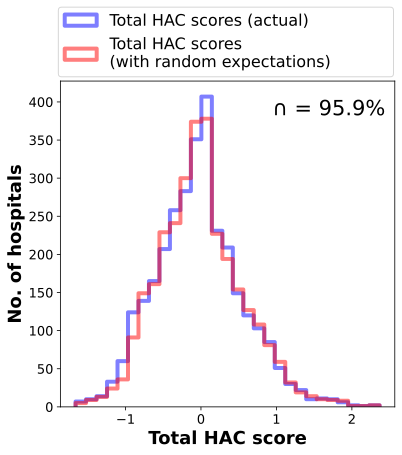

In [3]:
num_bins = 30
hi_CAUTI = []
hi_CLABSI = []
hi_CDIFF = []
hi_MRSA = []

fyrs = ['2022']
for fyr in sorted(fyrs, reverse=False):
    
    tdf = main_df[main_df['file_year'] == fyr]
    tdf = tdf[~tdf['Total HAC Score'].isin([np.nan, float('NaN')])]
    tdf = tdf.filter(items=['Total HAC Score', 'Total HAC Score (random-based)'], axis=1)
    
    ################################ GENERATE FIGURE ########################################
    fig = plt.figure(figsize=(6, 6))
    rows, cols = 1, 1
    fs = 14
    radius = 2
    
    ################################## SUBPLOT 1 ############################################
    ax1 = plt.subplot2grid((rows, cols), (0, 0), colspan=1, rowspan=1)
    
    y = tdf['Total HAC Score']
    y = y.tolist()
    x = tdf['Total HAC Score (random-based)']
    x = x.tolist()
    x = sorted(x)
    y = sorted(y)

    min_x = min([min(x), min(y)])
    max_x = max([max(x), max(y)])

    counts2, bins2, bars2 = plt.hist(y, bins=np.linspace(min_x, max_x, num_bins), histtype='step', density=False, color='b', 
                                     label='Total HAC scores (actual)', linewidth=4, alpha=0.5)
    counts1, bins1, bars1 = plt.hist(x, bins=np.linspace(min_x, max_x, num_bins), histtype='step', density=False, color='r', 
                                     label='Total HAC scores\n(with random expectations)', linewidth=4, alpha=0.5)
    
    hi, hi2 = histogram_intersection(counts1, counts2)
    
    plt.text(0.4*max_x, 0.94*max([max(counts1), max(counts2)]), '∩ = ' + str(np.round(hi,1)) + '%', fontsize=fs+7)
    
    s = r'$^{*}$' + ' Scores for CAUTI, CLABSI, MRSA and CDIFF based on\n'
    s += "  SIRs where reported no.'s of infections were replaced\n"
    s += '  with random outcomes.'
    
    plt.legend(bbox_to_anchor=(-0.03, 1.02, 1.05, .2), loc=10, ncol=1, frameon=True, mode="expand",prop={'size':fs+2})
    plt.ylabel('No. of hospitals', fontsize=fs+4, fontweight='bold')
    plt.xlabel('Total HAC score', fontsize=fs+4, fontweight='bold')
    plt.tick_params(axis='both', labelsize=fs-1)
    
    x = tdf['Total HAC Score (random-based)']
    y = tdf['Total HAC Score']
    minx = min([min(x), min(y)])
    maxx = max([max(x), max(y)])
    
    ################################ FINAL FORMATTING #######################################
    plt.subplots_adjust(wspace=0.5, hspace=0.4)
    plt.savefig(mydir+'/figures/Hists_HAC.png', dpi=400, bbox_inches = "tight", facecolor='w')
    plt.show()


## Exhibit 2.

Comparison of average volumes for CAUTI, CLABSI, MRSA, and CDIFF between all hospitals in the 2022 HACRP having total HAC scores, hospitals that were penalized by the 2022 HACRP, and hospitals that would have been penalized if random effects of volume had been mitigated via use of the SIS.

In [4]:
from scipy.stats import gmean, gstd, iqr


def p_diff(x, y):
    return np.round(100 * (np.abs(x - y)/np.mean([x, y])),1)

def get_central_tendency(x, metric):
    if np.min(x) == 0:
        x = x + 1
     
    if metric == 'gmean':
        avg = gmean(x)
        sd = gstd(x)
    
    elif metric == 'mean':
        avg = np.nanmean(x)
        sd = np.nanstd(x)
    
    elif metric == 'sqrt':
        avg = np.nanmean(np.sqrt(x))**2
        sd = np.nanstd(np.sqrt(x))**2
        
    elif metric == 'median':
        avg = np.nanmedian(x)
        sd = iqr(x)
    
    return avg, sd
    

############################################################################################
##################### Changes in Penalty Assignment ########################################
############################################################################################

tdf = main_df[main_df['file_year'] == '2022']
tdf = tdf[~tdf['Payment Reduction'].isin([np.nan, float('NaN')])]
tdf = tdf[~tdf['Payment Reduction (SIS-based)'].isin([np.nan, float('NaN')])]
tdf = tdf[~tdf['Total HAC Score'].isin([np.nan, float('NaN')])]

penalized_SIS = tdf['Payment Reduction (SIS-based)'].tolist()
penalized_SIR = tdf['Payment Reduction'].tolist()

fptnp = 0
fnptp = 0
no_change = 0
fptp = 0
fnptnp = 0
p_sir = 0
p_sis = 0
np_sir = 0
for i, v1 in enumerate(penalized_SIR):
    v2 = penalized_SIS[i]
    
    if v1 == 'Yes':
        p_sir += 1
    if v1 == 'No':
        np_sir += 1
    if v2 == 'Yes':
        p_sis += 1
    if v1 == 'Yes' and v2 == 'No':
        fptnp += 1
    elif v1 == 'No' and v2 == 'Yes':
        fnptp += 1
    elif v1 == 'Yes' and v2 == 'Yes':
        fptp += 1
    elif v1 == 'No' and v2 == 'No':
        fnptnp += 1
        
d = len(penalized_SIR)
print('In HACRP year 2022:\n')
#print('No. of hospitals NOT penalized via SIR:', np_sir)
print('No. of hospitals penalized via SIR:', p_sir)
print('No. of hospitals penalized via SIS:', p_sis)
print('No. of hospitals penalized via SIR but not penalized via SIS:', fptnp, ',', np.round(100*fptnp/d,2), '%')
print('No. of hospitals penalized via SIS but not penalized via SIR:', fnptp, ',', np.round(100*fnptp/d,2), '%')
print('No. of hospitals penalized via both SIR and SIS:', fptp, ',', np.round(100*fptp/d,2), '%')
#print('No. of hospitals not penalized via both SIR and SIS:', fnptnp, ',', np.round(100*fnptnp/d,2), '%', '\n')

avg_hac_score = np.nanmean(tdf['Total HAC Score'])
#print('Mean total HAC score (using SIR):', avg_hac_score)
avg_hac_score = np.nanmean(tdf['Total HAC Score (SIS-based)'])
#print('Mean total HAC score (using SIS):', avg_hac_score, '\n\n')


print('\n')      
####################################################################################################        
################# GET VOLUMES ######################################################################
####################################################################################################

metrics = ['mean']

for metric in metrics:
    print('---------------  Based on average volumes  ---------------\n\n')
    
    #################### SIR based ####################
    print('Using the SIR:\n') 
    
    hais = ['CAUTI', 'CLABSI', 'MRSA', 'CDI']
    for hai in hais:
        tdf2 = tdf[~tdf[hai + ' Volume'].isin([np.nan, float('NaN')])]
        tdf2 = tdf2[tdf2['Payment Reduction'] == 'No']
        avg_np, sd = get_central_tendency(tdf2[hai + ' Volume'], metric)
        print(hai, '(not penalized):', np.round(avg_np,2), ',', np.round(sd,2), 'SD')
        
        sir_df = tdf[tdf['Payment Reduction'] == 'Yes']
        sir_df = sir_df[~sir_df[hai + ' Volume'].isin([np.nan, float('NaN')])]
        avg_p, sd = get_central_tendency(sir_df[hai + ' Volume'], metric)
        
        s = '% difference from non-penalized'
        pdiff = str(p_diff(avg_p, avg_np)) + s
        
        x1 = tdf2[hai + ' Volume']
        x2 = sir_df[hai + ' Volume']
        
        if metric == 'sqrt':
            x1 = np.sqrt(x1)
            x2 = np.sqrt(x2)
            
        if metric == 'gmean':
            x1 = np.log10(x1+1)
            x2 = np.log10(x2+1)
        
        if metric == 'median':
            stat, pval, m, table = stats.median_test(x1, x2,
                            nan_policy='omit',
                            )
        else:
            t_stat, pval = stats.ttest_ind(x1, x2,
                        equal_var=False, #nan_policy='omit',
                        alternative='less',
                        )
            
        print(hai, '(penalized):', np.round(avg_p,2), ',', np.round(sd,2), ' | ', pdiff, ', p =', np.round(pval,5), '\n')
    
    #################### SIS based ####################    
    print('\n')
    print('Using the SIS:\n')
    
    for hai in hais:
        tdf2 = tdf[~tdf[hai + ' Volume'].isin([np.nan, float('NaN')])]
        tdf2 = tdf2[tdf2['Payment Reduction (SIS-based)'] == 'No']
        avg_np, sd = get_central_tendency(tdf2[hai + ' Volume'], metric)
        print(hai, '(not penalized):', np.round(avg_np,2), ',', np.round(sd,2), 'SD')
        
        sis_df = tdf[tdf['Payment Reduction (SIS-based)'] == 'Yes']
        sis_df = sis_df[~sis_df[hai + ' Volume'].isin([np.nan, float('NaN')])]
        avg_p, sd = get_central_tendency(sis_df[hai + ' Volume'], metric)
        
        s = '% difference from non-penalized'
        pdiff = str(p_diff(avg_p, avg_np)) + s
        
        x1 = tdf[hai + ' Volume']
        x2 = sis_df[hai + ' Volume']
        
        if metric == 'sqrt':
            x1 = np.sqrt(x1)
            x2 = np.sqrt(x2)
        
        if metric == 'median':
            stat, pval, m, table = stats.median_test(x1, x2,
                            nan_policy='omit',
                            #random_state=1,
                            #alternative='less',
                        )
        else:
            t_stat, pval = stats.ttest_ind(x1, x2,
                        equal_var=False, nan_policy='omit',
                        permutations=None, random_state=1,
                        #alternative='less',
                    )
        print(hai, '(penalized):', np.round(avg_p,2), ',', np.round(sd,2), ' | ', pdiff, ', p =', np.round(pval,5), '\n')
    
    print('\n')



In HACRP year 2022:

No. of hospitals penalized via SIR: 761
No. of hospitals penalized via SIS: 764
No. of hospitals penalized via SIR but not penalized via SIS: 101 , 3.3 %
No. of hospitals penalized via SIS but not penalized via SIR: 104 , 3.4 %
No. of hospitals penalized via both SIR and SIS: 660 , 21.6 %


---------------  Based on average volumes  ---------------


Using the SIR:

CAUTI (not penalized): 4997.58 , 6177.44 SD
CAUTI (penalized): 6672.32 , 8329.69  |  28.7% difference from non-penalized , p = 0.0 

CLABSI (not penalized): 5010.29 , 8055.98 SD
CLABSI (penalized): 7310.78 , 11561.27  |  37.3% difference from non-penalized , p = 0.0 

MRSA (not penalized): 45863.38 , 58761.13 SD
MRSA (penalized): 59278.39 , 72139.38  |  25.5% difference from non-penalized , p = 0.0 

CDI (not penalized): 42202.37 , 53643.72 SD
CDI (penalized): 54660.14 , 65826.85  |  25.7% difference from non-penalized , p = 0.0 



Using the SIS:

CAUTI (not penalized): 5310.4 , 6492.28 SD
CAUTI (penal

## Exhibit 3.

Change in HAC rankings (after basing HAC scores on the SIS) versus average device days (mean of CAUTI and CLABSI) and average patient days (mean of MRSA and CDIFF). Each point represents a hospital. White points are hospitals that were neither penalized by the 2022 HACRP nor by rederiving HAC scores based on the SIS.

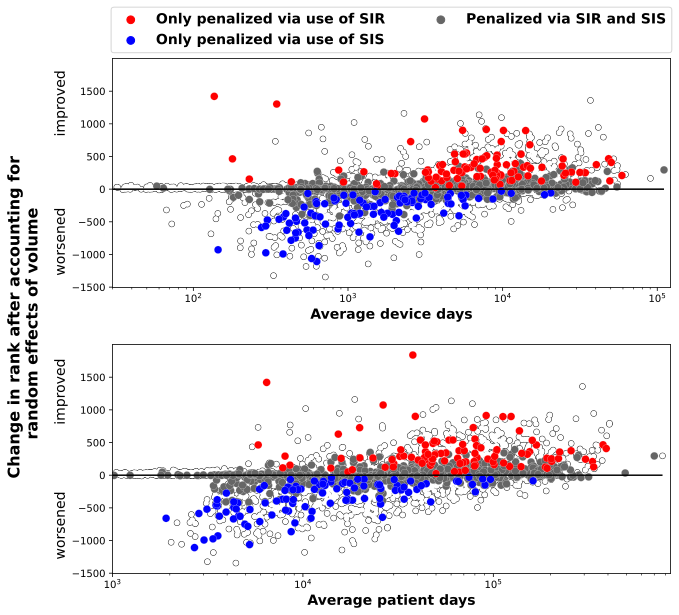

In [5]:
tdf = main_df[main_df['file_year'] == '2022']
tdf = tdf[~tdf['Payment Reduction'].isin([np.nan, float('NaN')])]
tdf = tdf[~tdf['Total HAC Score'].isin([np.nan, float('NaN')])]

tdf['Rank in total HAC score (SIR)'] = tdf['Total HAC Score'].rank(axis=0, method='min', na_option='keep', ascending=True)
tdf['Rank in total HAC score (SIS)'] = tdf['Total HAC Score (SIS-based)'].rank(axis=0, method='min', na_option='keep', ascending=True)
tdf['change in rank'] = tdf['Rank in total HAC score (SIR)'] - tdf['Rank in total HAC score (SIS)']
# When changes in rank are positive, a hospital's rank improved. When changes in rank are negative, a hospital's rank worsened.

tdf['Avg device days'] = tdf[['CAUTI Volume', 'CLABSI Volume']].mean(axis=1)
tdf['Avg patient days'] = tdf[['MRSA Volume', 'CDI Volume']].mean(axis=1)

fig = plt.figure(figsize=(10, 20))
rows, cols = 4, 2
fs = 14
radius = 200

################################ GENERATE FIGURE ########################################

################################## SUBPLOT 1 ############################################
ax1 = plt.subplot2grid((rows, cols), (0, 0), colspan=2, rowspan=1)
x = tdf['Avg device days']+1
y = tdf['change in rank']
ax1.scatter(x, y,facecolors='none', s = 30, edgecolors='0.1', linewidths=1.)
ax1.scatter(x, y, c = 'w', s = 30, edgecolors='k', linewidths=0.0)

c1 = 'r'
c2 = 'b'
c3 = '0.4'
s = 60

tdf2 = tdf[(tdf['Payment Reduction (SIS-based)'] == 'Yes') & (tdf['Payment Reduction'] == 'Yes')]
x1 = tdf2['Avg device days']+1
y1 = tdf2['change in rank']
plt.scatter(x1, y1, s=s, c=c3, edgecolors='w', linewidths=0.2)

tdf2 = tdf[(tdf['Payment Reduction'] == 'Yes') & (tdf['Payment Reduction (SIS-based)'] == 'No')]
x1 = tdf2['Avg device days']+1
y1 = tdf2['change in rank']
plt.scatter(x1, y1, s=s, c=c1, edgecolors='w', linewidths=0.2)

tdf2 = tdf[(tdf['Payment Reduction (SIS-based)'] == 'Yes') & (tdf['Payment Reduction'] == 'No')]
x1 = tdf2['Avg device days']+1
y1 = tdf2['change in rank']
plt.scatter(x1, y1, s=s, c=c2, edgecolors='w', linewidths=0.2)

plt.ylabel('worsened                improved', fontsize=fs)#, fontweight='bold')
plt.xlabel('Average device days', fontsize=fs, fontweight='bold')
plt.tick_params(axis='both', labelsize=fs-4)
plt.xlim(30, 1.1*max(x))
plt.hlines(0, 0, max(x), colors='k')
plt.xscale('log')

plt.scatter([-10], [-10], s=60, c=c1, label='Only penalized via use of SIR')
plt.scatter([-10], [-10], s=60, c=c2, label='Only penalized via use of SIS')
plt.scatter([-10], [-10], s=60, c=c3, label='Penalized via SIR and SIS')
plt.legend(bbox_to_anchor=(-.015, 1.05, 1.03, .15), loc=10, ncol=2, frameon=True, mode="expand", prop={'size':fs, 'weight':'bold'})


####################### SUBPLOT 2 ##################################################################

ax2 = plt.subplot2grid((rows, cols), (1, 0), colspan=2, rowspan=1)

x = tdf['Avg patient days']+1
y = tdf['change in rank']
ax2.scatter(x, y,facecolors='none', s = 30, edgecolors='0.1', linewidths=1.)
ax2.scatter(x, y, c = 'w', s = 30, edgecolors='k', linewidths=0.0)

tdf2 = tdf[(tdf['Payment Reduction (SIS-based)'] == 'Yes') & (tdf['Payment Reduction'] == 'Yes')]
x1 = tdf2['Avg patient days']+1
y1 = tdf2['change in rank']
plt.scatter(x1, y1, s=s, c=c3, edgecolors='w', linewidths=0.2)

tdf2 = tdf[(tdf['Payment Reduction'] == 'Yes') & (tdf['Payment Reduction (SIS-based)'] == 'No')]
x1 = tdf2['Avg patient days']+1
y1 = tdf2['change in rank']
plt.scatter(x1, y1, s=s, c=c1, edgecolors='w', linewidths=0.2)

tdf2 = tdf[(tdf['Payment Reduction (SIS-based)'] == 'Yes') & (tdf['Payment Reduction'] == 'No')]
x1 = tdf2['Avg patient days']+1
y1 = tdf2['change in rank']
plt.scatter(x1, y1, s=s, c=c2, edgecolors='w', linewidths=0.2)

plt.ylabel('worsened               improved', fontsize=fs)#, fontweight='bold')
plt.xlabel('Average patient days', fontsize=fs, fontweight='bold')
plt.tick_params(axis='both', labelsize=fs-4)
plt.xlim(1000, 1.1*max(x))
plt.hlines(0, 0, max(x), colors='k')
plt.xscale('log')
plt.text(280, 0, 'Change in rank after accounting for\n       random effects of volume', rotation=90, fontsize=fs+2, fontweight='bold')

plt.subplots_adjust(wspace=0.5, hspace=0.25)
plt.savefig(mydir+'/figures/change_in_rank.png', dpi=600, bbox_inches = "tight", facecolor='w')
plt.show()


## Exhibit 4.

Estimated yearly totals and cumulative totals of biased penalties and penalties that would have been assigned had HAC scores been based on the SIS (unbiased). Left column: bars are plus or minus one standard deviation. Solid points are 2022 values estimated from RAND cost report data. Right column: bars are plus or minus two standard deviations, for visibility.

In [6]:
main_df_no_md = main_df[main_df['State'] != 'MD']

cum_fp = [] # cumulative amount of penalties from false positives
cum_fn = [] # cumulative amount of penalties from false negatives
cum_is = [] # cumulative amount of savings to CMS
fp_ls = []
fn_ls = []
is_ls = []

for yr in yrs:
    tdf = main_df_no_md[main_df_no_md['file_year'] == yr]
    
    fp_df = tdf[(tdf['Payment Reduction'] == 'Yes') & (tdf['Payment Reduction (SIS-based)'] == 'No')]
    x = np.nansum(fp_df['HAC penalty, final'])
    fp_ls.append(x)
    cum_fp.append(sum(fp_ls))
    
    fn_df = tdf[(tdf['Payment Reduction'] == 'No') & (tdf['Payment Reduction (SIS-based)'] == 'Yes')]
    x = np.nansum(fn_df['HAC penalty, final'])
    fn_ls.append(x)
    cum_fn.append(sum(fn_ls))
    
    x = fp_ls[-1] - fn_ls[-1]
    is_ls.append(x)
    cum_is.append(sum(is_ls))
    
    
tdf = pd.DataFrame(columns=['Year'])
tdf['Year'] = yrs
tdf['Biased penalties, annual'] = fp_ls
tdf['Biased penalties, cumulative'] = cum_fp
tdf['CMS savings, annual'] = is_ls
tdf['CMS savings, cumulative'] = cum_is

for col in list(tdf):
    if col != 'Year':
        tdf[col] = tdf[col].apply(lambda x: "${:.1f}M".format((x/1000000)))

tdf.head(tdf.shape[0]) 

Year Biased penalties, annual Biased penalties, cumulative  \
0  2015                   $44.4M                       $44.4M   
1  2016                   $89.6M                      $134.0M   
2  2017                  $159.0M                      $292.9M   
3  2018                   $95.9M                      $388.9M   
4  2019                  $115.6M                      $504.5M   
5  2020                  $116.7M                      $621.2M   
6  2021                   $79.4M                      $700.5M   
7  2022                   $67.3M                      $767.8M   

  CMS savings, annual CMS savings, cumulative  
0               $7.4M                   $7.4M  
1              $66.1M                  $73.5M  
2             $129.1M                 $202.6M  
3              $56.8M                 $259.4M  
4              $95.5M                 $354.9M  
5              $98.0M                 $452.8M  
6              $55.1M                 $508.0M  
7              $49.9M                 $557.8M

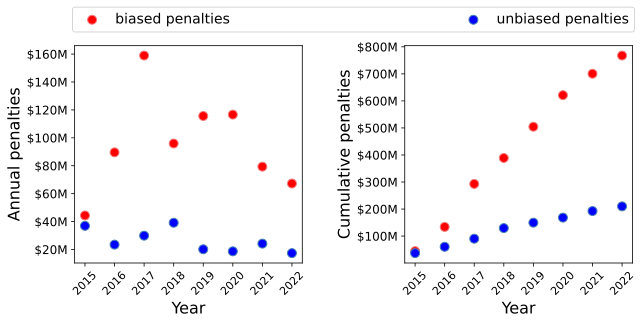

In [7]:
fig = plt.figure(figsize=(10, 8))
rows, cols = 2, 2
fs = 14
radius = 2

################################## Subplot 1 ############################################

ax1 = plt.subplot2grid((rows, cols), (0, 0), colspan=1, rowspan=1)
ln2 = ax1.scatter(yrs, [np.array(fp_ls)/10**6], c='r', s=80, label='biased penalties', edgecolors='lightcoral')
ln2 = ax1.scatter(yrs, [np.array(fn_ls)/10**6], c='b', s=80, label='unbiased penalties', edgecolors='steelblue')
plt.ylabel('Annual penalties', fontsize=fs+2)
plt.xlabel('Year', fontsize=fs+2)
plt.tick_params(axis='x', labelsize=fs-3, rotation=45)
plt.tick_params(axis='y', labelsize=fs-2)
ax1.set_yticks([20, 40, 60, 80, 100, 120, 140, 160])
ax1.set_yticklabels(['$20M', '$40M', '$60M', '$80M', '$100M', '$120M', '$140M', '$160M'])
plt.legend(bbox_to_anchor=(-0.04, 1.02, 2.53, .2), loc=10, ncol=2, frameon=True, 
           handletextpad = 0.65, mode="expand",prop={'size':fs})

################################## Subplot 2 ############################################

ax2 = plt.subplot2grid((rows, cols), (0, 1), colspan=1, rowspan=1)
ln2 = ax2.scatter(yrs, [np.array(cum_fp)/10**6], c='r', s=80, edgecolors='lightcoral')
ln2 = ax2.scatter(yrs, [np.array(cum_fn)/10**6], c='b', s=80, edgecolors='steelblue')
plt.ylabel('Cumulative penalties', fontsize=fs+2)
plt.xlabel('Year', fontsize=fs+2)
plt.tick_params(axis='x', labelsize=fs-3, rotation=45)
plt.tick_params(axis='y', labelsize=fs-2)
ax2.set_yticks([100, 200, 300, 400, 500, 600, 700, 800])
ax2.set_yticklabels(['$100M', '$200M', '$300M', '$400M', '$500M', '$600M', '$700M', '$800M'])

################################ FINAL FORMATTING #######################################

plt.subplots_adjust(wspace=0.45, hspace=0.)
plt.savefig(mydir+'/figures/expected_penalties.png', dpi=400, bbox_inches = "tight", facecolor='w')
plt.show()

#     

# Supplemental Exhibits

## Observed infections vs Number expected at random

In [8]:
 
def count_pts_within_radius(x, y, radius, logscale=0):
    """Count the number of points within a fixed radius in 2D space"""
    #TODO: see if we can improve performance using KDTree.query_ball_point
    #http://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.KDTree.query_ball_point.html
    #instead of doing the subset based on the circle
    raw_data = np.array([x, y])
    x = np.array(x)
    y = np.array(y)
    raw_data = raw_data.transpose()
    
    # Get unique data points by adding each pair of points to a set
    unique_points = set()
    for xval, yval in raw_data:
        unique_points.add((xval, yval))
    
    count_data = []
    for a, b in unique_points:
        if logscale == 1:
            num_neighbors = len(x[((log10(x) - log10(a)) ** 2 +
                                   (log10(y) - log10(b)) ** 2) <= log10(radius) ** 2])
        else:        
            num_neighbors = len(x[((x - a) ** 2 + (y - b) ** 2) <= radius ** 2])
        count_data.append((a, b, num_neighbors))
    return count_data



def plot_color_by_pt_dens(x, y, radius, loglog=0, plot_obj=None):
    """Plot bivariate relationships with large n using color for point density

    Inputs:
    x & y -- variables to be plotted
    radius -- the linear distance within which to count points as neighbors
    loglog -- a flag to indicate the use of a loglog plot (loglog = 1)

    The color of each point in the plot is determined by the logarithm (base 10)
    of the number of points that occur with a given radius of the focal point,
    with hotter colors indicating more points. The number of neighboring points
    is determined in linear space regardless of whether a loglog plot is
    presented.
    """
    plot_data = count_pts_within_radius(x, y, radius, loglog)
    sorted_plot_data = np.array(sorted(plot_data, key=lambda point: point[2]))

    if plot_obj == None:
        plot_obj = plt.axes()
        
    plot_obj.scatter(sorted_plot_data[:, 0],
            sorted_plot_data[:, 1],
            facecolors='none',
            s = 30, edgecolors='0.1', linewidths=0.75, #cmap='Greys_r',
            )
    # plot points
    c = np.array(sorted_plot_data[:, 2])**0.25
    c = np.max(c) - c
    plot_obj.scatter(sorted_plot_data[:, 0],
                    sorted_plot_data[:, 1],
                    c = c,
                    s = 30, edgecolors='k', linewidths=0.0, #cmap='Greys_r',
                    #alpha = 0.5,
                    )
        
    return plot_obj



fdates = ['2022_04']
for fdate in fdates:
    
    #########################################################################################
    ######################## DECLARE FIGURE OBJECT ##########################################
    #########################################################################################

    fig = plt.figure(figsize=(14, 14))
    rows, cols = 3, 3
    fs = 14
    radius = 1

    matplotlib.rcParams['legend.handlelength'] = 0
    matplotlib.rcParams['legend.numpoints'] = 1

    tdf = main_df[main_df['file_year'] == '2022']
    
    #########################################################################################
    ################################ GENERATE FIGURE ########################################
    #########################################################################################

    ################################## SUBPLOT 1 ############################################

    ax1 = plt.subplot2grid((rows, cols), (0, 0), colspan=1, rowspan=1)
    #ax1.set_xticks([0, 2, 4, 6, 8, 10, 12])

    cauti_df = tdf[(tdf['CAUTI expected O'] >= 0) & (tdf['CAUTI Observed Cases'] >= 0)]
    x = cauti_df['CAUTI expected O']**0.5
    y = cauti_df['CAUTI Observed Cases']**0.5
    
    r2 = obs_pred_rsquare(y, x)
    print('CAUTI r2:', np.round(r2,3))
    
    slope, intercept, r, p, se = sc.stats.linregress(x, y)
    maxv = min([np.max(x), np.max(y)])
    plt.plot([0, maxv], [0, maxv], 'k', linewidth=2)
    
    plot_color_by_pt_dens(x, y, radius, plot_obj=ax1)
    plt.tick_params(axis='both', labelsize=fs-4)
    plt.xlabel(r'$\sqrt{Random\ expectation}$', fontsize=fs)
    plt.ylabel(r'$\sqrt{CAUTI\ cases}$', fontsize=fs)
    plt.text(0.0*max(x), 0.94*max(y), r'$r^{2}$' + ' = ' + str(np.round(r2, 2)), fontsize=fs)
    
    
    ################################## SUBPLOT 2 ############################################

    ax2 = plt.subplot2grid((rows, cols), (0, 1), colspan=1, rowspan=1)
    
    clabsi_df = tdf[(tdf['CLABSI expected O'] >= 0) & (tdf['CLABSI Observed Cases'] >= 0)]
    x = clabsi_df['CLABSI expected O']**0.5
    y = clabsi_df['CLABSI Observed Cases']**0.5
    
    r2 = obs_pred_rsquare(y, x)
    print('CLABSI r2:', np.round(r2,3))
    
    maxv = min([np.max(x), np.max(y)])
    plt.plot([0, maxv], [0, maxv], 'k', linewidth=2)
    
    plot_color_by_pt_dens(x, y, radius, plot_obj=ax2)
    plt.tick_params(axis='both', labelsize=fs-4)
    plt.xlabel(r'$\sqrt{Random\ expectation}$', fontsize=fs)
    plt.ylabel(r'$\sqrt{CLABSI\ cases}$', fontsize=fs)
    plt.text(0.0*max(x), 0.94*max(y), r'$r^{2}$' + ' = ' + str(np.round(r2, 2)), fontsize=fs)
    
    
    ################################## SUBPLOT 3 ############################################

    ax3 = plt.subplot2grid((rows, cols), (1, 0), colspan=1, rowspan=1)

    mrsa_df = tdf[(tdf['MRSA expected O'] >= 0) & (tdf['MRSA Observed Cases'] >= 0)]
    x = mrsa_df['MRSA expected O']**0.5
    y = mrsa_df['MRSA Observed Cases']**0.5
    
    r2 = obs_pred_rsquare(y, x)
    print('MRSA r2:', np.round(r2,3))
    
    slope, intercept, r, p, se = sc.stats.linregress(x, y)
    maxv = min([np.max(x), np.max(y)])
    plt.plot([0, maxv], [0, maxv], 'k', linewidth=2)
    
    plot_color_by_pt_dens(x, y, radius, plot_obj=ax3)
    plt.tick_params(axis='both', labelsize=fs-4)
    plt.xlabel(r'$\sqrt{Random\ expectation}$', fontsize=fs)
    plt.ylabel(r'$\sqrt{MRSA\ cases}$', fontsize=fs)
    plt.text(0.0*max(x), 0.94*max(y), r'$r^{2}$' + ' = ' + str(np.round(r2, 2)), fontsize=fs)
    
    
    ################################## SUBPLOT 4 ############################################

    ax4 = plt.subplot2grid((rows, cols), (1, 1), colspan=1, rowspan=1)

    cdi_df = tdf[(tdf['CDI expected O'] >= 0) & (tdf['CDI Observed Cases'] >= 0)]
    x = cdi_df['CDI expected O']**0.5
    y = cdi_df['CDI Observed Cases']**0.5
    
    r2 = obs_pred_rsquare(y, x)
    print('CDI r2:', np.round(r2,3))
    
    slope, intercept, r, p, se = sc.stats.linregress(x, y)
    maxv = min([np.max(x), np.max(y)])
    plt.plot([0, maxv], [0, maxv], 'k', linewidth=2)
    
    plot_color_by_pt_dens(x, y, radius, plot_obj=ax4)
    plt.tick_params(axis='both', labelsize=fs-4)
    plt.xlabel(r'$\sqrt{Random\ expectation}$', fontsize=fs)
    plt.ylabel(r'$\sqrt{CDIFF\ cases}$', fontsize=fs)
    plt.text(0.0*max(x), 0.94*max(y), r'$r^{2}$' + ' = ' + str(np.round(r2, 2)), fontsize=fs)
    
    #########################################################################################
    ################################ FINAL FORMATTING #######################################
    #########################################################################################
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    plt.savefig(mydir+'/figures/Obs_v_Pred.png', dpi=400, bbox_inches = "tight", facecolor='w')
    plt.show()


CAUTI r2: 0.688
CLABSI r2: 0.697
MRSA r2: 0.574
CDI r2: 0.762


## stuff ...

In [9]:
def p_diff(x, y):
    return np.round(100 * (np.abs(x - y)/np.mean([x, y])),1)

def get_central_tendency(x, metric):
    if np.min(x) == 0:
        x = x + 1
     
    if metric == 'gmean':
        avg = gmean(x)
        sd = gstd(x)
    
    elif metric == 'mean':
        avg = np.nanmean(x)
        sd = np.nanstd(x)
    
    elif metric == 'sqrt':
        avg = np.nanmean(np.sqrt(x))**2
        sd = np.nanstd(np.sqrt(x))**2
        
    elif metric == 'median':
        avg = np.nanmedian(x)
        sd = iqr(x)
    
    return avg, sd
    

############################################################################################
##################### Changes in Penalty Assignment ########################################
############################################################################################

tdf = main_df[main_df['file_year'] == '2022']
tdf = tdf[~tdf['Payment Reduction'].isin([np.nan, float('NaN')])]
tdf = tdf[~tdf['Payment Reduction (SIS-based)'].isin([np.nan, float('NaN')])]
tdf = tdf[~tdf['Total HAC Score'].isin([np.nan, float('NaN')])]

penalized_SIS = tdf['Payment Reduction (SIS-based)'].tolist()
penalized_SIR = tdf['Payment Reduction'].tolist()

fptnp = 0
fnptp = 0
no_change = 0
fptp = 0
fnptnp = 0
p_sir = 0
p_sis = 0
np_sir = 0
for i, v1 in enumerate(penalized_SIR):
    v2 = penalized_SIS[i]
    
    if v1 == 'Yes':
        p_sir += 1
    if v1 == 'No':
        np_sir += 1
    if v2 == 'Yes':
        p_sis += 1
    if v1 == 'Yes' and v2 == 'No':
        fptnp += 1
    elif v1 == 'No' and v2 == 'Yes':
        fnptp += 1
    elif v1 == 'Yes' and v2 == 'Yes':
        fptp += 1
    elif v1 == 'No' and v2 == 'No':
        fnptnp += 1
        
d = len(penalized_SIR)
print('\n')
#print('No. of hospitals NOT penalized via SIR:', np_sir)
print('No. of hospitals penalized via SIR:', p_sir)
print('No. of hospitals penalized via SIS:', p_sis)
print('No. of hospitals penalized via SIR but not penalized via SIS:', fptnp, ',', np.round(100*fptnp/d,2), '%')
print('No. of hospitals penalized via SIS but not penalized via SIR:', fnptp, ',', np.round(100*fnptp/d,2), '%')
print('No. of hospitals penalized via both SIR and SIS:', fptp, ',', np.round(100*fptp/d,2), '%')
#print('No. of hospitals not penalized via both SIR and SIS:', fnptnp, ',', np.round(100*fnptnp/d,2), '%', '\n')

avg_hac_score = np.nanmean(tdf['Total HAC Score'])
#print('Mean total HAC score (using SIR):', avg_hac_score)
avg_hac_score = np.nanmean(tdf['Total HAC Score (SIS-based)'])
#print('Mean total HAC score (using SIS):', avg_hac_score, '\n\n')


print('\n')

####################################################################################################        
################# GET VOLUMES ######################################################################
####################################################################################################

metrics = ['mean', 'sqrt', 'median', 'gmean']

for metric in metrics:
    print('---------------  ' + metric + '  ---------------\n')
    
    #################### SIR based ####################
    print('Using the SIR:\n') 
    
    hais = ['CAUTI', 'CLABSI', 'MRSA', 'CDI']
    for hai in hais:
        tdf2 = tdf[~tdf[hai + ' Volume'].isin([np.nan, float('NaN')])]
        tdf2 = tdf2[tdf2['Payment Reduction'] == 'No']
        avg_np, sd = get_central_tendency(tdf2[hai + ' Volume'], metric)
        print(hai, '(not penalized):', np.round(avg_np, 2), ',', np.round(sd, 2), 'SD')
        
        sir_df = tdf[tdf['Payment Reduction'] == 'Yes']
        sir_df = sir_df[~sir_df[hai + ' Volume'].isin([np.nan, float('NaN')])]
        avg_p, sd = get_central_tendency(sir_df[hai + ' Volume'], metric)
        
        s = '% difference from non-penalized'
        pdiff = str(p_diff(avg_p, avg_np)) + s
        
        x1 = tdf2[hai + ' Volume']
        x2 = sir_df[hai + ' Volume']
        
        if metric == 'sqrt':
            x1 = np.sqrt(x1)
            x2 = np.sqrt(x2)
            
        if metric == 'gmean':
            x1 = np.log10(x1+1)
            x2 = np.log10(x2+1)
        
        if metric == 'median':
            stat, pval, m, table = stats.median_test(x1, x2,
                            nan_policy='omit',
                            )
        else:
            t_stat, pval = stats.ttest_ind(x1, x2,
                        equal_var=False, #nan_policy='omit',
                        alternative='less',
                        )
            
        print(hai, '(penalized):', np.round(avg_p,2), ',', np.round(sd,2), ' | ', pdiff, ', p =', np.round(pval,5), '\n')
    
    #print('\n')
       
        
    #################### SIS based ####################    
    #print('\n')
    print('Using the SIS:\n')
    
    for hai in hais:
        tdf2 = tdf[~tdf[hai + ' Volume'].isin([np.nan, float('NaN')])]
        tdf2 = tdf2[tdf2['Payment Reduction (SIS-based)'] == 'No']
        avg_np, sd = get_central_tendency(tdf2[hai + ' Volume'], metric)
        print(hai, '(not penalized):', np.round(avg_np, 2), ',', np.round(sd, 2), 'SD')
        
        sis_df = tdf[tdf['Payment Reduction (SIS-based)'] == 'Yes']
        sis_df = sis_df[~sis_df[hai + ' Volume'].isin([np.nan, float('NaN')])]
        avg_p, sd = get_central_tendency(sis_df[hai + ' Volume'], metric)
        
        s = '% difference from non-penalized'
        pdiff = str(p_diff(avg_p, avg_np)) + s
        
        x1 = tdf[hai + ' Volume']
        x2 = sis_df[hai + ' Volume']
        
        if metric == 'sqrt':
            x1 = np.sqrt(x1)
            x2 = np.sqrt(x2)
        
        if metric == 'median':
            stat, pval, m, table = stats.median_test(x1, x2,
                            nan_policy='omit',
                            #random_state=1,
                            #alternative='less',
                        )
        else:
            t_stat, pval = stats.ttest_ind(x1, x2,
                        equal_var=False, nan_policy='omit',
                        permutations=None, random_state=1,
                        #alternative='less',
                    )
        print(hai, '(penalized):', np.round(avg_p,2), ',', np.round(sd,2), ' | ', pdiff, ', p =', np.round(pval,5), '\n')
    
    print('\n')





No. of hospitals penalized via SIR: 761
No. of hospitals penalized via SIS: 764
No. of hospitals penalized via SIR but not penalized via SIS: 101 , 3.3 %
No. of hospitals penalized via SIS but not penalized via SIR: 104 , 3.4 %
No. of hospitals penalized via both SIR and SIS: 660 , 21.6 %


---------------  mean  ---------------

Using the SIR:

CAUTI (not penalized): 4997.58 , 6177.44 SD
CAUTI (penalized): 6672.32 , 8329.69  |  28.7% difference from non-penalized , p = 0.0 

CLABSI (not penalized): 5010.29 , 8055.98 SD
CLABSI (penalized): 7310.78 , 11561.27  |  37.3% difference from non-penalized , p = 0.0 

MRSA (not penalized): 45863.38 , 58761.13 SD
MRSA (penalized): 59278.39 , 72139.38  |  25.5% difference from non-penalized , p = 0.0 

CDI (not penalized): 42202.37 , 53643.72 SD
CDI (penalized): 54660.14 , 65826.85  |  25.7% difference from non-penalized , p = 0.0 

Using the SIS:

CAUTI (not penalized): 5310.4 , 6492.28 SD
CAUTI (penalized): 5727.29 , 7698.19  |  7.6% differen

## More stuff

Analyze differences in VOLUMES


In [10]:

tdf = main_df[main_df['file_year'] == '2022']
tdf['total_volume'] = np.sqrt(tdf['CAUTI Volume']) + np.sqrt(tdf['CLABSI Volume']) + np.sqrt(tdf[['MRSA Volume', 'CDI Volume']].mean(axis=1))

#tdf = tdf[~tdf['Total HAC Score'].isin([np.nan, float('NaN')])]
#tdf = tdf[~tdf['Total HAC Score (SIS-based)'].isin([np.nan, float('NaN')])]
#tdf = tdf[~tdf['total_volume'].isin([np.nan, float('NaN')])]
#tdf = tdf[tdf['Payment Reduction'].isin(['Yes', 'No'])]
#tdf = tdf[tdf['Payment Reduction (SIS-based)'].isin(['Yes', 'No'])]

sigdig = 5
    
not_pen_by_sir = tdf[tdf['Payment Reduction'] == 'No']
pen_by_sir = tdf[tdf['Payment Reduction'] == 'Yes']
    
not_pen_by_sis = tdf[tdf['Payment Reduction (SIS-based)'] == 'No']
pen_by_sis = tdf[tdf['Payment Reduction (SIS-based)'] == 'Yes']

never_pen = tdf[(tdf['Payment Reduction'] == 'No') & (tdf['Payment Reduction (SIS-based)'] == 'No')]
    
tdf1 = not_pen_by_sir[~not_pen_by_sir['total_volume'].isin([np.nan, float('NaN')])]
tdf2 = pen_by_sir[~pen_by_sir['total_volume'].isin([np.nan, float('NaN')])]
        
x1 = tdf1['total_volume'].tolist()
x2 = tdf2['total_volume'].tolist()        
t_stat, pval = stats.ttest_ind(x1, x2, 
                    equal_var=False, nan_policy='omit',
                    permutations=None, random_state=1,
                    )
print('\n')
print('One-sided t-tests:')
print('Not penalized by SIR vs. penalized by SIR:  t =', np.round(t_stat,sigdig), '| p = ', np.round(pval,sigdig))

tdf3 = not_pen_by_sis[~not_pen_by_sis['total_volume'].isin([np.nan, float('NaN')])]
tdf4 = pen_by_sis[~pen_by_sis['total_volume'].isin([np.nan, float('NaN')])]

x3 = tdf3['total_volume'].tolist()
x4 = tdf4['total_volume'].tolist()       
t_stat, pval = stats.ttest_ind(x3, x4,
                equal_var=False, nan_policy='omit',
                permutations=None, random_state=1,
            )

print('Not penalized by SIS vs. penalized by SIS:  t =', np.round(t_stat,sigdig), '| p = ', np.round(pval,sigdig))
print('\n')







One-sided t-tests:
Not penalized by SIR vs. penalized by SIR:  t = -5.90454 | p =  0.0
Not penalized by SIS vs. penalized by SIS:  t = -1.1129 | p =  0.26596




In [11]:
################## Iterative Kruskal Wallis test ######### 

pen_by_both = tdf[(tdf['Payment Reduction'] == 'Yes') & (tdf['Payment Reduction (SIS-based)'] == 'Yes')]
pen_only_by_sir = tdf[(tdf['Payment Reduction'] == 'Yes') & (tdf['Payment Reduction (SIS-based)'] == 'No')]
pen_only_by_sis = tdf[(tdf['Payment Reduction'] == 'No') & (tdf['Payment Reduction (SIS-based)'] == 'Yes')]

ct = 0
pvals1 = [] # Kruskal Wallis 
Hs = [] # Kruskal Wallis
pvals2 = [] # Dunnet (MC): Never penalized vs. Penalized by SIR
pvals3 = [] # Dunnet (MC): Never penalized vs. Penalized by SIS
pvals4 = [] # Dunnet (MC): Penalized by SIR vs. Penalized by SIS

np.random.seed(1)
while ct < 10**2:
    ct += 1
    pen_both1 = pen_by_both.sample(frac=0.5, replace=False, random_state=ct)
    ids = pen_both1['Facility ID'].tolist()
    pen_both2 = pen_by_both[~pen_by_both['Facility ID'].isin(ids)]
        
    pen_by_SIR = pd.concat([pen_only_by_sir, pen_both1])
    pen_by_SIR.drop_duplicates(inplace=True)
    
    pen_by_SIS = pd.concat([pen_only_by_sis, pen_both2])
    pen_by_SIS.drop_duplicates(inplace=True)
    
    tdf5 = never_pen[~never_pen['total_volume'].isin([np.nan, float('NaN')])]
    tdf6 = pen_by_SIR[~pen_by_SIR['total_volume'].isin([np.nan, float('NaN')])]
    tdf7 = pen_by_SIS[~pen_by_SIS['total_volume'].isin([np.nan, float('NaN')])]
            
    x5 = tdf5['total_volume']
    x6 = tdf6['total_volume']
    x7 = tdf7['total_volume']
    
    #print(len(x5), len(x6), len(x7))
    #sys.exit()
    minlen = min([len(x5), len(x6), len(x7)])
    n = 100
    x5 = np.random.choice(x5, size=minlen, replace=False)
    x6 = np.random.choice(x6, size=minlen, replace=False)
    x7 = np.random.choice(x7, size=minlen, replace=False)
    
    H, pval = stats.kruskal(x5, x6, x7)
    
    Hs.append(H)
    pvals1.append(pval)
    r = sp.posthoc_dunn([x5, x6, x7], p_adjust = 'simes-hochberg')
    #r = sp.posthoc_dunn([x5, x6, x7], p_adjust = 'bonferroni')
    #r = sp.posthoc_dunn([x5, x6, x7], p_adjust = 'fdr_tsbky')
    
    pvals2.append(r[1][2])
    pvals3.append(r[1][3])    
    pvals4.append(r[2][3])   

print('3-sample Kruskal-Wallis test followed by Dunnett multiple comparisons test')
print('[10K iterations of random sampling to achieve independent observations and equal samples sizes]\n')
print('Never penalized vs. Penalized by SIR vs Penalized by SIS:')
print('Kruskal Wallace (avg H) = ', np.round(np.nanmean(Hs), sigdig), ', SD =', np.round(np.nanstd(Hs), sigdig), ' | avg p = ', np.round(np.nanmean(pvals1), sigdig), ', SD =', np.round(np.nanstd(pvals1), sigdig))

print('\n')
print('Dunnett multiple-comparisons test')
print('Never penalized vs. Penalized by SIR: avg p = ', np.round(np.nanmean(pvals2), sigdig), ', SD =', np.round(np.nanstd(pvals2), sigdig))
print('Never penalized vs. Penalized by SIS: avg p = ', np.round(np.nanmean(pvals3), sigdig), ', SD =', np.round(np.nanstd(pvals3), sigdig))   
print('Penalized by SIR vs. Penalized by SIS: avg p = ', np.round(np.nanmean(pvals4), sigdig), ', SD =', np.round(np.nanstd(pvals4), sigdig))   
print('\n\n')

3-sample Kruskal-Wallis test followed by Dunnett multiple comparisons test
[10K iterations of random sampling to achieve independent observations and equal samples sizes]

Never penalized vs. Penalized by SIR vs Penalized by SIS:
Kruskal Wallace (avg H) =  24.16959 , SD = 7.04541  | avg p =  0.0003 , SD = 0.00164


Dunnett multiple-comparisons test
Never penalized vs. Penalized by SIR: avg p =  0.00131 , SD = 0.00427
Never penalized vs. Penalized by SIS: avg p =  0.59371 , SD = 0.26996
Penalized by SIR vs. Penalized by SIS: avg p =  0.00121 , SD = 0.00428



